In [1]:
import ase.db
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from DIP16 import DIP16
import matplotlib as mpl
import numpy as np

def calc_errors(calc,ref):
    me = 0
    mae = 0
    for i in range(len(calc)): 
        #print(calc[i],ref[i])
        tmp = calc[i]-ref[i]
        me += tmp 
        mae += abs(tmp) 
    me = me/len(calc)
    mae = mae/len(calc)
    #print('ME: {} MAE: {}'.format(me,mae))
    return me,mae 

ref = [2.013, 0.000, 1.040, 0.000, 1.760, 1.460, 0.000, 3.690, 0.000, 0.574, 1.205, 0.000, 1.565, 0.565, 0.000, 0.000]
# 5th value disagrees with paper

In [2]:
def get_dataset(db,output_key,relaxed,mode,grid,init_orbs,xc,basis,verbose):
    """
        Get a specific property for all database (db) entries 
    """
    db = ase.db.connect(db)
    #print(db)
    x = []
    y = []
    z = []
    for row in db.select(relaxed=relaxed,mode=mode,grid=grid,init_orbs=init_orbs,xc=xc,basis=basis): 
        #print(row.name,row.mode,row.xc,row.basis,row.dipolemom,row.energy)
        x.append(row.name)
        if output_key == 'energy':
            y.append(row.energy)
        if output_key == 'dipolemom':
            y.append(row.dipolemom/0.2081943)
            z.append(row.dipole/0.2081943)
            
        if verbose > 3:
            if mode == 'DFT':
                init_orbs = mode
            print('{} {} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'.format(row.name,init_orbs,row.dipolemom/0.2081943,z[-1][0],z[-1][1],z[-1][2]))
    
    return x,y,z

def get_entry(db,name,output_key,relaxed,mode,grid,init_orbs,xc,basis):
    """
        Get a specific property for single entry (name)
    """
    #print(db,name,output_key,relaxed,mode,grid,init_orbs,xc,basis)
    db = ase.db.connect(db)
    #print(db)
    for row in db.select(name=name,relaxed=relaxed,mode=mode,grid=grid,init_orbs=init_orbs,xc=xc,basis=basis): 
        #print(row.name,row.mode,row.xc,row.basis,row.dipolemom,row.energy)
        if row.name == name: 
            x = row.name
        if output_key == 'energy':
            y = row.energy
        if output_key == 'dipolemom':
            y = row.dipolemom/0.2081943
            z = row.dipole/0.2081943
    return x,y,z

def get_FOD_sets(db,db_sys,FOD_set,output_key,relaxed,mode,grid,xc,basis,verbose=0):
    """
        Get dipole for entry with specification (FOD_set)
    """
    sys = list(db_sys.keys())
    x = []
    y = []
    z = []
    db = ase.db.connect(db)
    for i,s in enumerate(sys): 
        e = +1e7
        for row in db.select(name=s,relaxed=relaxed,mode=mode,grid=grid,xc=xc,basis=basis):
            if row.name == s:
                # If the structure is either Lewis or Linnett
                # no Linnett structures for mol04, mol07, mol09
                if row.init_orbs[0:5] == FOD_set[0:5] or row.name in ['mol04','mol07','mol09']:
                    x_tmp = row.name
                    e_tmp = row.energy
                    dip_tmp = row.dipolemom/0.2081943
                    dip = row.dipole/0.2081943
                    if e_tmp < e:
                        e = e_tmp 
                        tmp_init_orbs  = row.init_orbs
                        y_tmp = dip_tmp 
                        z_tmp = dip        
        x.append(x_tmp)
        y.append(y_tmp)
        z.append(z_tmp)  
        
        if verbose > 3:
            print('{} {} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'.format(s,FOD_set,y_tmp,z_tmp[0],z_tmp[1],z_tmp[2]))        
        
    return x,y,z




def get_FOD_lowest_energy(db,db_sys,output_key,relaxed,mode,grid,xc,basis,verbose):
    """
        Get dipole for entry with the lowest energy 
    """
    sys = list(db_sys.keys())
    x = []
    y = []
    z = []
    db = ase.db.connect(db)
    for i,s in enumerate(sys): 
        e = +1e7
        for row in db.select(name=s,relaxed=relaxed,mode=mode,grid=grid,xc=xc,basis=basis):
            if row.name == s and row.init_orbs !='FB': # Exclude FB rom the evaluation
                x_tmp = row.name
                e_tmp = row.energy
                dip_tmp = row.dipolemom/0.2081943
                dipole = row.dipole/0.2081943
                if e_tmp < e: 
                    e = e_tmp 
                    tmp_init_orbs  = row.init_orbs
                    y_tmp = dip_tmp 
                    z_tmp = dipole
                    
        x.append(x_tmp)
        y.append(y_tmp)
        z.append(z_tmp)
        
        if verbose > 3:
            print('{} {} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'.format(s,'Emin',y_tmp,z_tmp[0],z_tmp[1],z_tmp[2]))
    return x,y,z

In [5]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# DFT
x,y,z = get_dataset(db='DIP16_ERKALE.db',output_key='dipolemom',relaxed=False,mode='DFT',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',verbose=4)
me,mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('DFT',me,mae))

mol01 DFT       1.94       0.27       1.43      -1.28
mol02 DFT       0.00      -0.00      -0.00       0.00
mol03 DFT       0.96      -0.46       0.66      -0.53
mol04 DFT       0.00       0.00      -0.00       0.00
mol05 DFT       1.75       0.29      -1.71       0.27
mol06 DFT       1.38      -0.96       0.98      -0.08
mol07 DFT       0.00       0.00       0.00      -0.00
mol08 DFT       3.17      -2.91       1.25      -0.02
mol09 DFT       0.00      -0.00      -0.00      -0.00
mol10 DFT       0.64      -0.31       0.43       0.36
mol11 DFT       1.42       0.89      -0.24       1.09
mol12 DFT       0.00       0.00      -0.00      -0.00
mol13 DFT       1.15       0.71       0.91       0.00
mol14 DFT       0.43      -0.00      -0.06      -0.43
mol15 DFT       0.00      -0.00      -0.00      -0.00
mol16 DFT       0.00      -0.00       0.00       0.00
DFT ME:  -0.06 MAE:   0.10


In [6]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# FB localization as starting point
# Using RSIC
x,y,z = get_dataset(db='DIP16_ERKALE.db',output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',verbose=4)
me,mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('RSIC FB',me,mae))

mol01 FB       2.17       0.31       1.62      -1.41
mol02 FB       0.06       0.05      -0.03       0.01
mol03 FB       1.15      -0.53       0.80      -0.62
mol04 FB       0.00       0.00       0.00       0.00
mol05 FB       3.46       0.58      -3.37       0.53
mol06 FB       1.44      -1.14       0.87      -0.01
mol07 FB       0.00      -0.00       0.00       0.00
mol08 FB       4.03      -3.70       1.59      -0.02
mol09 FB       0.00      -0.00       0.00       0.00
mol10 FB       0.46      -0.22       0.31       0.26
mol11 FB       1.98       1.23      -0.33       1.51
mol12 FB       0.00       0.00      -0.00       0.00
mol13 FB       2.23       1.37       1.76      -0.00
mol14 FB       0.98      -0.01      -0.13      -0.97
mol15 FB       0.00      -0.00      -0.00      -0.00
mol16 FB       0.00      -0.00       0.00       0.00
RSIC FB ME:   0.26 MAE:   0.27


In [7]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# FB localization as starting point
# Using CSIC
x,y,z = get_dataset(db='DIP16_ERKALE.db',output_key='dipolemom',relaxed=False,mode='CSIC',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',verbose=4)
me,mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('CSIC FB',me,mae))

mol01 FB       2.13       0.30       1.58      -1.40
mol02 FB       0.02       0.01      -0.00      -0.00
mol03 FB       0.82      -0.51       0.48      -0.43
mol04 FB       0.00       0.00      -0.00       0.00
mol05 FB       3.49       0.58      -3.40       0.53
mol06 FB       1.39      -1.05       0.90      -0.04
mol07 FB       0.00      -0.00      -0.00      -0.00
mol08 FB       3.92      -3.60       1.55      -0.02
mol09 FB       0.01      -0.00       0.01      -0.00
mol10 FB       0.49      -0.24       0.33       0.27
mol11 FB       1.61       1.00      -0.27       1.23
mol12 FB       0.00      -0.00       0.00       0.00
mol13 FB       2.16       1.33       1.70      -0.00
mol14 FB       0.96      -0.01      -0.13      -0.95
mol15 FB       0.00      -0.00       0.00      -0.00
mol16 FB       0.00      -0.00       0.00       0.00
CSIC FB ME:   0.19 MAE:   0.24


In [8]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# FODs as starting point, using the E_min classifier
# Using RSIC
x,y,z = get_FOD_lowest_energy(db='DIP16_ERKALE.db',db_sys=DIP16,output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=4)
me,mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('RSIC E_min',me,mae))

mol01 Emin       2.05       0.28       1.51      -1.36
mol02 Emin       0.36      -0.35       0.05       0.01
mol03 Emin       0.65      -0.31       0.45      -0.36
mol04 Emin       0.00       0.00      -0.00       0.00
mol05 Emin       3.41       0.57      -3.33       0.52
mol06 Emin       1.44      -1.14       0.88      -0.00
mol07 Emin       0.01       0.01      -0.00       0.00
mol08 Emin       4.03      -3.70       1.59      -0.02
mol09 Emin       0.00      -0.00       0.00       0.00
mol10 Emin       0.51      -0.24       0.34       0.28
mol11 Emin       1.77       1.10      -0.30       1.36
mol12 Emin       0.00       0.00      -0.00      -0.00
mol13 Emin       2.23       1.37       1.76      -0.00
mol14 Emin       0.98      -0.01      -0.13      -0.97
mol15 Emin       0.00      -0.00      -0.00      -0.00
mol16 Emin       0.00      -0.00       0.00       0.00
RSIC E_min ME:   0.22 MAE:   0.28


In [9]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# FODs as starting point, using the E_min classifier
# Using CSIC
x,y,z = get_FOD_lowest_energy(db='DIP16_ERKALE.db',db_sys=DIP16,output_key='dipolemom',relaxed=False,mode='CSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=4)
me,mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('CSIC E_min',me,mae))

mol01 Emin       2.13       0.31       1.57      -1.40
mol02 Emin       0.02       0.02      -0.00      -0.00
mol03 Emin       0.77      -0.36       0.53      -0.42
mol04 Emin       0.00       0.00      -0.00       0.00
mol05 Emin       3.49       0.58      -3.40       0.53
mol06 Emin       1.38      -1.05       0.90      -0.04
mol07 Emin       0.01       0.00      -0.00       0.00
mol08 Emin       3.79      -3.48       1.50      -0.02
mol09 Emin       0.01      -0.00      -0.01       0.01
mol10 Emin       0.49      -0.24       0.33       0.28
mol11 Emin       1.48       0.92      -0.25       1.13
mol12 Emin       0.00       0.00       0.00       0.00
mol13 Emin       2.16       1.33       1.70       0.00
mol14 Emin       0.96      -0.01      -0.13      -0.95
mol15 Emin       0.00      -0.00      -0.00      -0.00
mol16 Emin       0.00      -0.00       0.00       0.00
CSIC E_min ME:   0.18 MAE:   0.23


In [6]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# FODs as starting point, using the LT classifier
# Using RSIC
x,y,z = get_FOD_sets(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Lewis',output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=4)
me, mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('RSIC Lewis',me,mae))


mol01 Lewis       2.05       0.28       1.51      -1.36
mol02 Lewis       0.36      -0.35       0.05       0.01
mol03 Lewis       0.72      -0.22       0.56      -0.40
mol04 Lewis       0.00       0.00      -0.00       0.00
mol05 Lewis       3.42       0.57      -3.33       0.53
mol06 Lewis       1.44      -1.14       0.88      -0.00
mol07 Lewis       0.01       0.01      -0.00       0.00
mol08 Lewis       4.03      -3.70       1.59      -0.03
mol09 Lewis       0.00      -0.00       0.00       0.00
mol10 Lewis       0.39      -0.19       0.26       0.22
mol11 Lewis       1.77       1.10      -0.30       1.36
mol12 Lewis       0.00       0.00      -0.00      -0.00
mol13 Lewis       2.23       1.37       1.76      -0.00
mol14 Lewis       0.98      -0.01      -0.13      -0.97
mol15 Lewis       0.00      -0.00      -0.00      -0.00
mol16 Lewis       0.00      -0.00       0.00       0.00
RSIC Lewis ME:   0.22 MAE:   0.29


In [11]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# FODs as starting point, using the LT classifier
# Using CSIC
x,y,z = get_FOD_sets(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Lewis',output_key='dipolemom',relaxed=False,mode='CSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=4)
me, mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('CSIC Lewis',me,mae))


mol01 Lewis       2.13       0.31       1.57      -1.40
mol02 Lewis       0.02       0.02      -0.00      -0.00
mol03 Lewis       0.82      -0.26       0.63      -0.45
mol04 Lewis       0.00       0.00      -0.00       0.00
mol05 Lewis       3.49       0.58      -3.40       0.53
mol06 Lewis       1.38      -1.05       0.90      -0.04
mol07 Lewis       0.01       0.00      -0.00       0.00
mol08 Lewis       3.93      -3.61       1.55      -0.02
mol09 Lewis       0.01      -0.00       0.01      -0.00
mol10 Lewis       0.51      -0.25       0.34       0.29
mol11 Lewis       1.61       1.00      -0.27       1.23
mol12 Lewis       0.00       0.00       0.00       0.00
mol13 Lewis       2.16       1.33       1.70       0.00
mol14 Lewis       0.96      -0.01      -0.13      -0.95
mol15 Lewis       0.00      -0.00      -0.00      -0.00
mol16 Lewis       0.00      -0.00       0.00       0.00
CSIC Lewis ME:   0.20 MAE:   0.24


In [12]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# FODs as starting point, using the LDQ classifier
# Using RSIC
x,y,z = get_FOD_sets(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Linnett',output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=4)
me, mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('RSIC Linnett',me,mae))

mol01 Linnett       2.22       0.31       1.64      -1.46
mol02 Linnett       0.00      -0.00      -0.00       0.00
mol03 Linnett       0.65      -0.31       0.45      -0.36
mol04 Linnett       0.00       0.00      -0.00       0.00
mol05 Linnett       3.41       0.57      -3.33       0.52
mol06 Linnett       1.37      -1.05       0.88      -0.03
mol07 Linnett       0.01       0.01      -0.00       0.00
mol08 Linnett       4.03      -3.70       1.59      -0.02
mol09 Linnett       0.00      -0.00       0.00       0.00
mol10 Linnett       0.51      -0.24       0.34       0.28
mol11 Linnett       1.44       0.90      -0.24       1.10
mol12 Linnett       0.00       0.00      -0.00      -0.00
mol13 Linnett       2.23       1.37       1.76       0.00
mol14 Linnett       0.98      -0.01      -0.14      -0.97
mol15 Linnett       0.00      -0.00      -0.00      -0.00
mol16 Linnett       0.00      -0.00       0.00       0.00
RSIC Linnett ME:   0.19 MAE:   0.25


In [13]:
#Print absolute dipole and components
# calculate ME and MAE, with verbose=4 you get the dipole moments
# FODs as starting point, using the LDQ classifier
# Using RSIC
x,y,z = get_FOD_sets(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Linnett',output_key='dipolemom',relaxed=False,mode='CSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=4)
me, mae = calc_errors(y,ref)
print('{} ME: {:6.2f} MAE: {:6.2f}'.format('CSIC Linnett',me,mae))

mol01 Linnett       2.25       0.31       1.66      -1.48
mol02 Linnett       0.00      -0.00       0.00      -0.00
mol03 Linnett       0.77      -0.36       0.53      -0.42
mol04 Linnett       0.00       0.00      -0.00       0.00
mol05 Linnett       3.48       0.58      -3.39       0.53
mol06 Linnett       1.36      -1.02       0.89      -0.04
mol07 Linnett       0.01       0.00      -0.00       0.00
mol08 Linnett       3.79      -3.48       1.50      -0.02
mol09 Linnett       0.01      -0.00       0.01      -0.00
mol10 Linnett       0.49      -0.24       0.33       0.28
mol11 Linnett       1.48       0.92      -0.25       1.13
mol12 Linnett       0.00      -0.00       0.00      -0.00
mol13 Linnett       1.27       0.78       1.00       0.00
mol14 Linnett       0.48      -0.01      -0.07      -0.48
mol15 Linnett       0.00      -0.00      -0.00      -0.00
mol16 Linnett       0.00      -0.00       0.00       0.00
CSIC Linnett ME:   0.09 MAE:   0.20


In [3]:
# Global evaluation of dipole moments

def eval_DIP16(db,output_key,relaxed,grid,xc,basis):
    """ 
        Eval DIP16 results 
    """

    mpl.rcParams['xtick.labelsize'] = 8
    fontP = FontProperties()
    #fontP.set_size('xx-small')
    fontP.set_size('large')
    calcs = ['DFT', 'RSIC', 'CSIC']
    #fig1, subs = plt.subplots(2, 2, sharex=True,sharey=True)
    fig1, subs = plt.subplots(1, 3, sharex=True,sharey=True)
    verbose = 2
    
    for mode in range(len(calcs)):
        INIT_ORBS = ['LT','LDQ','Emin'] 

        sets = []
        for init_orbs in INIT_ORBS:
            #if init_orbs == 'FB':
            #    tmp = get_dataset(db=db,output_key=output_key,relaxed=relaxed,mode=calcs[mode],grid=grid,init_orbs=init_orbs,xc=xc,basis=basis,verbose=verbose)
            if init_orbs == 'LT': 
                tmp = get_FOD_sets(db=db,db_sys=DIP16,FOD_set='Lewis',output_key=output_key,relaxed=relaxed,mode=calcs[mode],grid=grid,xc=xc,basis=basis,verbose=verbose)
            if init_orbs == 'LDQ': 
                tmp = get_FOD_sets(db=db,db_sys=DIP16,FOD_set='Linnett',output_key=output_key,relaxed=relaxed,mode=calcs[mode],grid=grid,xc=xc,basis=basis,verbose=verbose)
            if init_orbs == 'Emin':
                tmp = get_FOD_lowest_energy(db=db,db_sys=DIP16,output_key=output_key,relaxed=relaxed,mode=calcs[mode],grid=grid,xc=xc,basis=basis,verbose=verbose)    
            #print(tmp)
            sets.append(tmp) 

        markers = ['D','s','x','o']
        #print(sets)
        ax = subs[mode]
        ax.set_title('{}, {}'.format(calcs[mode],basis),fontsize=20)
        handels = []
        ax.tick_params(axis='x', labelrotation = 45)
        names = ['LT','LDQ',r'$E_{\mathrm{min}}$']
        for s in range(len(sets)):
            tmp, = ax.plot(sets[s][0],sets[s][1],markers[s],label='{}'.format(names[s]))
            handels.append(tmp)
    subs[0].set_ylabel(r'$|\mu|$ [D]',fontsize=20)
    #subs[2].set_ylabel(r'$|\mu|$ [D]')
    subs[-1].legend(handles=handels,bbox_to_anchor=(1.0, 0), loc=6, prop=fontP)
    plt.show()

<IPython.core.display.Javascript object>


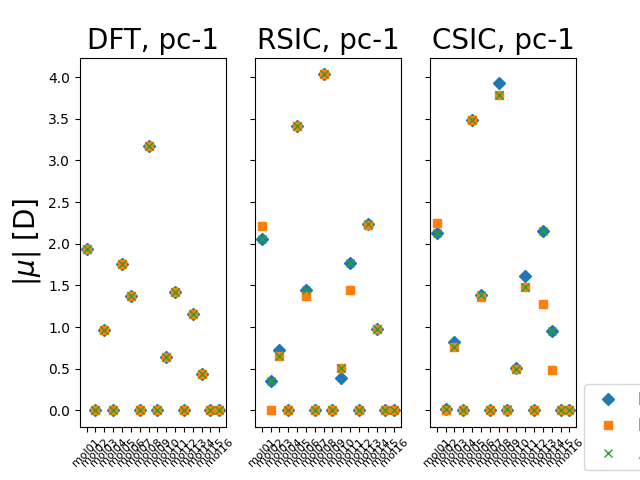

In [15]:
# Calculated dipole moments, from LDA, RSIC, CSIC
eval_DIP16(db='DIP16_ERKALE.db',output_key='dipolemom',relaxed=False,grid='(150,1202)',xc='LDA',basis='pc-1')

<IPython.core.display.Javascript object>


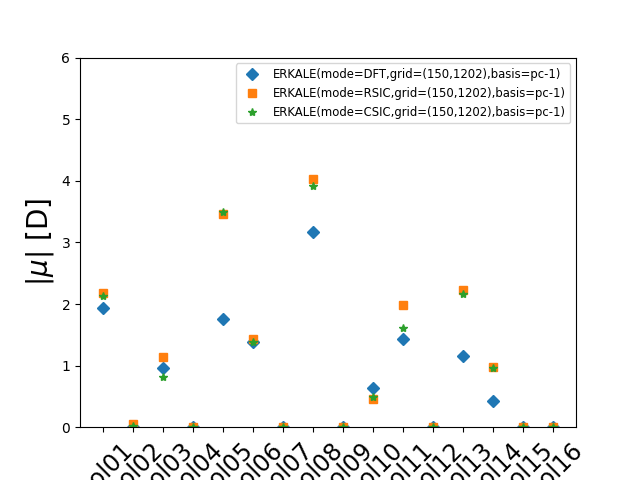

In [16]:
def pic_DIP16(db):
    """
        Compare DFT, RSIC and CSIC
    """
    
    mpl.rcParams['xtick.labelsize'] = 17
    fontP = FontProperties()
    fontP.set_size('small')

    verbose = 2
    DFT = get_dataset(db=db,output_key='dipolemom',relaxed=False,mode='DFT',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',verbose=verbose)
    RSIC = get_dataset(db=db,output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',verbose=verbose)
    CSIC = get_dataset(db=db,output_key='dipolemom',relaxed=False,mode='CSIC',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',verbose=verbose)
    
    fig1 = plt.figure()
    ax = plt.gca()
    ax.tick_params(axis='x', labelrotation = 45)
    dft, = ax.plot(DFT[0],DFT[1],'D',label='{}'.format('ERKALE(mode=DFT,grid=(150,1202),basis=pc-1)'))
    rsic, = ax.plot(RSIC[0],RSIC[1],'s',label='{}'.format('ERKALE(mode=RSIC,grid=(150,1202),basis=pc-1)'))
    csic, = ax.plot(CSIC[0],CSIC[1],'*',label='{}'.format('ERKALE(mode=CSIC,grid=(150,1202),basis=pc-1)'))
    handels = [dft,rsic,csic]
    plt.ylim([0,6])
    plt.legend(handles=handels, prop=fontP)
    plt.ylabel(r'$|\mu|$ [D]',fontsize=20)
    plt.show()
    
pic_DIP16(db='DIP16_ERKALE.db')

In [4]:
from my_viewer import MyView
from ase.atoms import Atoms
from ipywidgets import interact, interactive, fixed, interact_manual

def my_view(ase_atoms): 
    return MyView(ase_atoms)


# Lowest E, excluding FB
def get_system_FOD_lowest_energy(db,db_sys,relaxed,mode,grid,xc,basis,rot):
    sys = list(db_sys.keys())
    Structs = {}
    db = ase.db.connect(db)
    for i,s in enumerate(sys): 
        e = +1e7
        low_energy_atoms = None
        for row in db.select(name=s,relaxed=relaxed,mode=mode,grid=grid,xc=xc,basis=basis):
            if row.name == s and row.init_orbs !='FB': # Exclude FB 
                x_tmp = row.name
                e_tmp = row.energy
                dip_tmp = row.dipolemom/0.2081943
                atoms = Atoms(symbols=row.symbols,positions=row.positions)
                #atoms.center(vacuum=row.vac)
                #atoms.set_pbc(False)
 
                atoms.energy = row.energy 
                atoms.dipole = row.dipole
                atoms.dipolemom = row.dipolemom
                atoms.name = row.name #'{}-{}-{}-{}-{}'.format(row.name,row.mode,row.basis,row.h,row.xc)
                atoms.rot_x,atoms.rot_y,atoms.rot_z,atoms.zoom = rot[row.name]
                atoms.dip_color = dct_dip_colors[row.init_orbs]
                if e_tmp < e: 
                    e = e_tmp 
                    low_energy_atoms = atoms
                    
        Structs.update({row.name : low_energy_atoms})
    return Structs

# Lewis and Linnett
def get_system_FOD_set(db,db_sys,FOD_set,relaxed,mode,grid,xc,basis,rot):
    db = ase.db.connect(db)
    Structs = {}
    sys = list(db_sys.keys())
    x = []
    y = []
    for i,name in enumerate(sys):
        e = +1e7
        init_orbs = FOD_set # FOD_set[i][-1]
        
        #print(name,init_orbs)
        for row in db.select(name=name,relaxed=relaxed,mode=mode,grid=grid,xc=xc,basis=basis):
        #for row in db.select(name=name,relaxed=relaxed,mode=mode,grid=grid,init_orbs=init_orbs,xc=xc,basis=basis):
            if row.init_orbs[0:5] == FOD_set[0:5] or row.name in ['mol04','mol07','mol09']:
                x_tmp = row.name
                e_tmp = row.energy
                dip_tmp = row.dipolemom/0.2081943
                atoms = Atoms(symbols=row.symbols,positions=row.positions)
                #atoms.center(vacuum=row.vac)
                #atoms.set_pbc(False)
 
                atoms.energy = row.energy 
                atoms.dipole = row.dipole
                atoms.dipolemom = row.dipolemom
                atoms.name = row.name #'{}-{}-{}-{}-{}'.format(row.name,row.mode,row.basis,row.h,row.xc)
                atoms.rot_x,atoms.rot_y,atoms.rot_z,atoms.zoom = rot[row.name]
                atoms.dip_color = dct_dip_colors[init_orbs]
                if e_tmp < e: 
                    e = e_tmp 
                    low_energy_atoms = atoms
                Structs.update({row.name : low_energy_atoms})
            
    return Structs 

def get_system(db,output_key,relaxed,mode,grid,init_orbs,xc,basis,rot):
    db = ase.db.connect(db)
    Structs = {}
    for row in db.select(relaxed=relaxed,mode=mode,grid=grid,init_orbs=init_orbs,xc=xc,basis=basis): 
        atoms = Atoms(symbols=row.symbols,positions=row.positions)
        #atoms.center(vacuum=row.vac)
        #atoms.set_pbc(False)
 
        atoms.energy = row.energy 
        atoms.dipole = row.dipole
        atoms.dipolemom = row.dipolemom
        atoms.name = row.name #'{}-{}-{}-{}-{}'.format(row.name,row.mode,row.basis,row.h,row.xc)
        atoms.rot_x,atoms.rot_y,atoms.rot_z,atoms.zoom = rot[row.name]
        atoms.dip_color = dct_dip_colors[init_orbs]
        Structs.update({row.name : atoms})
    return Structs 

def view_structure(structures):
    myview = my_view(structures)
    myview.rotate_view(x=structures.rot_x,y=structures.rot_y,z=structures.rot_z)
    myview.dip_color = structures.dip_color
    myview.d1.value = structures.dip_color
    myview.display()
    #display(myview.view)
    return myview 

dct_dip_colors =  {'DFT' : 'blue',
                   'Lewis1' : 'tomato',
                   'Lewis' : 'tomato',
                   'Linnett2': 'darkgreen' ,
                   'Linnett1': 'lightgreen',
                   'Linnett': 'lightgreen',
                   'Lewis2' : 'lightpink',
                   'Lewis4' : 'violett',
                   'Lewis3' : 'orange',
                   'FB' : 'darkgrey'}


rot_DIP16 = {'mol01' : [39,-5,15,0], 
             'mol02' : [29,12,0,0], 
             'mol03' : [-5,-29,-124,0],
             'mol04' : [77,30,-10,0], 
             'mol05' : [5,-10,260,0],
             'mol06' : [-16,165,-21,0], 
             'mol07' : [-10,25,59,0],
             'mol08' : [0,0,203,0],
             'mol09' : [-20,30,60,0], 
             'mol10' : [-48,45,5,0],
             'mol11' : [32,51,15,0],
             'mol12' : [9,0,85,0], 
             'mol13' : [0,0,128,0], 
             'mol14' : [90,89,0,0],
             'mol15' : [10,0,0,0],
             'mol16' : [10,0,0,0]}

#DATA = get_system_FOD_lowest_energy(db='DIP16_ERKALE.db',db_sys=DIP16,relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',rot=rot_DIP16)
DATA = get_system_FOD_set(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Lewis',relaxed=False,mode='CSIC',grid='(150,1202)',xc='LDA',basis='pc-1',rot=rot_DIP16)
#DATA = get_system_FOD_set(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Linnett',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',rot=rot_DIP16)
interact(view_structure, structures=DATA)



interactive(children=(Dropdown(description='structures', options={'mol01': Atoms(symbols='C13H9He47NX47', pbc=…

<function __main__.view_structure(structures)>

In [18]:
# Generate figures for a classifier of FODs

import time
from ipywidgets import GridBox, Layout

dct_colors = {'blue': [0, 1, 1],
              'tomato' : [255/255, 99/255, 71/255],
              'lightgreen' : [144/255,238/255,144/255],
              'lightpink' : [255/255,182/255,193/255],
              'violett' : [173/255, 149/255, 243/255],
              'orange': [230/255, 107/255, 25/255]}

class Parameters: 
    def __init__(self): 
        self.FODs_equal_digits = 3 
        self.FOD_up = 'X'
        self.FOD_dn = 'He'
        self.r_FOD = 0.1
        self.dip_color = dct_colors['lightgreen']
        self.dip_radius = 0.2 
        self.rot_x = 0 
        self.rot_y = 0 
        self.rot_z = 0
        self.zoom = 0 
        self.output_name = 'screenshot'

def plot_structures_DIP16(ase_atoms,p): 
    myview = my_view(ase_atoms)
    myview.rotate_view(x=ase_atoms.rot_x,y=ase_atoms.rot_y,z=ase_atoms.rot_z)       
    myview.on_click_dipole(myview.b2)
    myview.s2.value = 0.53
    myview.on_click_ball_and_stick(myview.b3)
    myview.on_click_screenshot(myview.b1)
    return myview 
    
rot_DIP16 = {'mol01' : [39,-5,15,0], 
             'mol02' : [29,12,0,0], 
             'mol03' : [-5,-29,-124,0],
             'mol04' : [77,30,-10,0], 
             'mol05' : [5,-10,260,0],
             'mol06' : [-16,165,-21,0], 
             'mol07' : [-10,25,59,0],
             'mol08' : [0,0,203,0],
             'mol09' : [-20,30,60,0], 
             'mol10' : [-48,45,5,0],
             'mol11' : [32,51,15,0],
             'mol12' : [9,0,85,0], 
             'mol13' : [0,0,128,0], 
             'mol14' : [90,89,0,0],
             'mol15' : [10,0,0,0],
             'mol16' : [10,0,0,0]}

def run():
    #FB = get_system(db='DIP16_ERKALE.db',output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',rot=rot_DIP16)
    #lowestE = get_system_FOD_lowest_energy(db='DIP16_ERKALE.db',db_sys=DIP16,relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',rot=rot_DIP16)
    #LT = get_system_FOD_set(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Lewis',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',rot=rot_DIP16)
    LDQ = get_system_FOD_set(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Linnett',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',rot=rot_DIP16)
    
    DATA = LDQ
    
    p = Parameters()
    sys = list(DATA.keys()) 
    TMP = []
    for s in sys: 
        ase_atoms = DATA[s]
        p.rot_x, p.rot_y, p.rot_z, p.zoom = rot_DIP16[s]
        tmp = plot_structures_DIP16(ase_atoms,p=p)
        display(tmp.view)
        TMP.append(tmp.view)
        time.sleep(0.1)
    
    #g = GridBox(children=tuple(TMP),
    #        layout=Layout(
    #            width='100%',
    #            grid_template_rows='auto auto auto auto auto auto auto',
    #            grid_template_columns='50% 50%'
    #        )
    #       )
    #return g 

run()
time.sleep(10)


NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

<IPython.core.display.Javascript object>


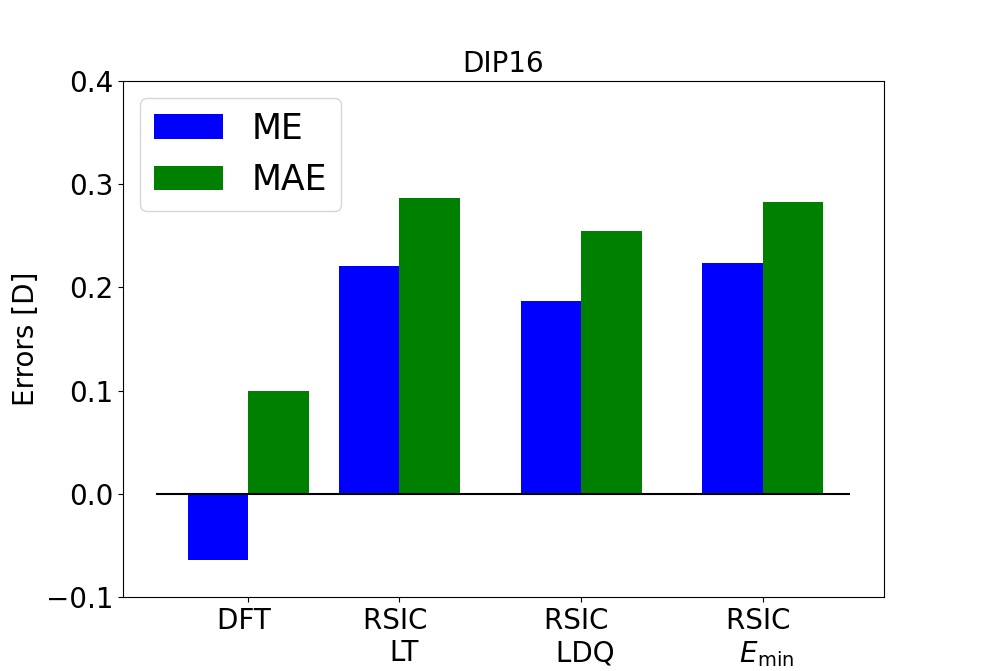

In [5]:
# DIP16 errors 
import matplotlib.pyplot as plt
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
# our data 
# DFT 
verbose = 2

x,y,z = get_dataset(db='DIP16_ERKALE.db',output_key='dipolemom',relaxed=False,mode='DFT',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',verbose=verbose)
DFT = calc_errors(y,ref)
#
x,y,z = get_FOD_lowest_energy(db='DIP16_ERKALE.db',db_sys=DIP16,output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=verbose)
Emin = calc_errors(y,ref)
#
x,y,z = get_FOD_sets(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Lewis',output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=verbose)
LT = calc_errors(y,ref)
#
x,y,z = get_FOD_sets(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Linnett',output_key='dipolemom',relaxed=False,mode='RSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=verbose)
LDQ = calc_errors(y,ref)


fig, ax = plt.subplots()
ax.set_title('DIP16',fontsize=20)
width=0.35
x = np.array([0.35,3.5*width,6.5*width,9.5*width]) # 12.5*width
# values paper supplement S4
LDA = np.array([DFT[0],LT[0],LDQ[0],Emin[0]])
LDAFLOSIC= np.array([DFT[1],LT[1],LDQ[1],Emin[1]])
labels = ["DFT \n ","RSIC \n LT","RSIC \n LDQ","RSIC \n $E_{\mathrm{min}}$"] # "LDA-RSIC \n FB"
ax.plot([0,4.],[0,0],color='black')
ax.bar(x,LDA,width=width,color='blue',label='ME')
ax.bar(x+width,LDAFLOSIC,width=width,color='green',label='MAE')
ax.set_xticks(x+width/2)
ax.set_xticklabels(labels)
ax.set_ylabel('Errors [D]',fontsize=20)
ax.set_ylim([-0.1,0.4])
ax.legend(loc=2,fontsize=25)

<IPython.core.display.Javascript object>


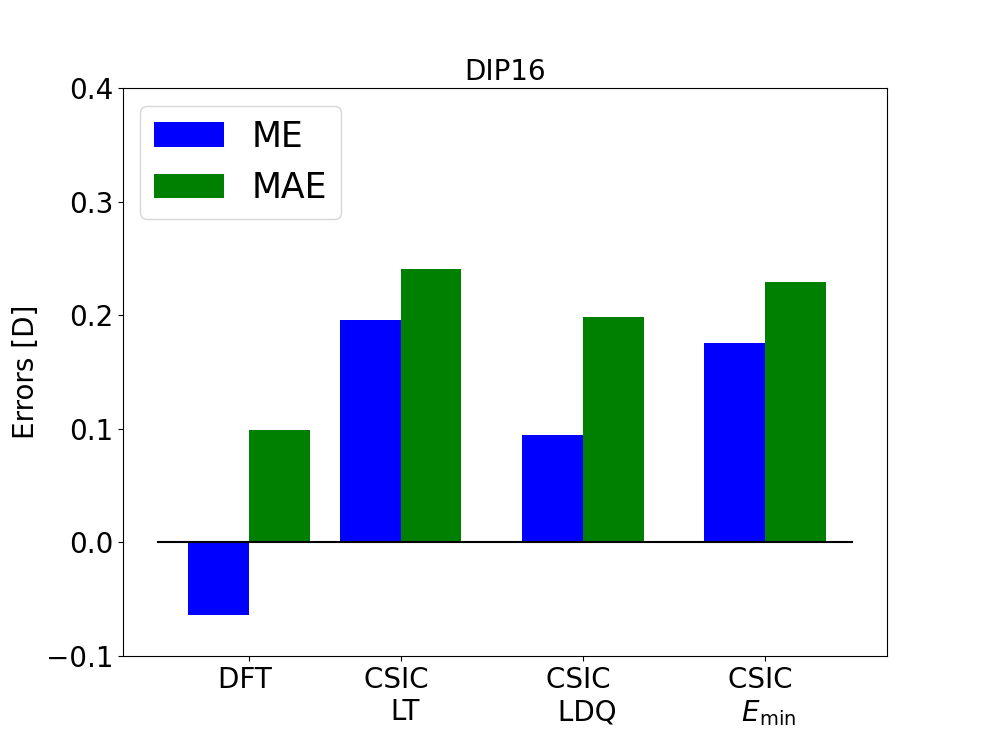

In [6]:
# DIP16 errors 
import matplotlib.pyplot as plt
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

# our data 
# DFT 
verbose = 2

x,y,z = get_dataset(db='DIP16_ERKALE.db',output_key='dipolemom',relaxed=False,mode='DFT',grid='(150,1202)',init_orbs='FB',xc='LDA',basis='pc-1',verbose=verbose)
DFT = calc_errors(y,ref)
#
x,y,z = get_FOD_lowest_energy(db='DIP16_ERKALE.db',db_sys=DIP16,output_key='dipolemom',relaxed=False,mode='CSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=verbose)
Emin = calc_errors(y,ref)
#
x,y,z = get_FOD_sets(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Lewis',output_key='dipolemom',relaxed=False,mode='CSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=verbose)
LT = calc_errors(y,ref)
#
x,y,z = get_FOD_sets(db='DIP16_ERKALE.db',db_sys=DIP16,FOD_set='Linnett',output_key='dipolemom',relaxed=False,mode='CSIC',grid='(150,1202)',xc='LDA',basis='pc-1',verbose=verbose)
LDQ = calc_errors(y,ref)


fig, ax = plt.subplots()
ax.set_title('DIP16',fontsize=20)
width=0.35
x = np.array([0.35,3.5*width,6.5*width,9.5*width]) # ,12.5*width
# values paper supplement S4
LDA = np.array([DFT[0],LT[0],LDQ[0],Emin[0]]) # ,FB[0]
LDAFLOSIC= np.array([DFT[1],LT[1],LDQ[1],Emin[1]]) # FB[1]
labels = ["DFT \n ","CSIC \n LT","CSIC \n LDQ","CSIC \n $E_{\mathrm{min}}$"] # "LDA-CSIC \n FB",
ax.plot([0,4.],[0,0],color='black')
ax.bar(x,LDA,width=width,color='blue',label='ME')
ax.bar(x+width,LDAFLOSIC,width=width,color='green',label='MAE')
ax.set_xticks(x+width/2)
ax.set_xticklabels(labels)
ax.set_ylabel('Errors [D]',fontsize=20)
ax.set_ylim([-0.1,0.4])
ax.legend(loc=2,fontsize=25)